In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

import os, shutil
import random
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [22]:
negative_dir = "/home/pabloperez/Repositorios/estrabismo/photos/negative"
positive_dir = "/home/pabloperez/Repositorios/estrabismo/photos/positive"
train_dir = os.path.join("/home/pabloperez/Repositorios/estrabismo/ModelSample/train")
validation_dir = os.path.join("/home/pabloperez/Repositorios/estrabismo/ModelSample/validation")

In [23]:
'''
negative_train_dir = os.path.join(train_dir, "negative")
negative_validation_dir = os.path.join(validation_dir, "negative")
positive_train_dir = os.path.join(train_dir, "positive")
positive_validation_dir = os.path.join(validation_dir, "positive")

os.makedirs(negative_train_dir, exist_ok=True)
os.makedirs(negative_validation_dir, exist_ok=True)
os.makedirs(positive_train_dir, exist_ok=True)
os.makedirs(positive_validation_dir, exist_ok=True)


# Lista de nombres de archivo de las imágenes en los directorios "negative" y "positive"
negative_files = [os.path.join(negative_dir, f) for f in os.listdir(negative_dir) if os.path.isfile(os.path.join(negative_dir, f))]
positive_files = [os.path.join(positive_dir, f) for f in os.listdir(positive_dir) if os.path.isfile(os.path.join(positive_dir, f))]

# Dividir la lista de nombres de archivo en conjuntos de entrenamiento y validación
negative_train_files, negative_validation_files = train_test_split(negative_files, test_size=0.2)
positive_train_files, positive_validation_files = train_test_split(positive_files, test_size=0.2)

# Copiar imágenes de negative al directorio de entrenamiento
for filename in negative_train_files:
    destination = os.path.join(negative_train_dir, os.path.basename(filename))
    shutil.copy(filename, destination)

# Copiar imágenes de negative al directorio de validación
for filename in negative_validation_files:
    destination = os.path.join(negative_validation_dir, os.path.basename(filename))
    shutil.copy(filename, destination)

# Copiar imágenes de positive al directorio de entrenamiento
for filename in positive_train_files:
    destination = os.path.join(positive_train_dir, os.path.basename(filename))
    shutil.copy(filename, destination)

# Copiar imágenes de positive al directorio de validación
for filename in positive_validation_files:
    destination = os.path.join(positive_validation_dir, os.path.basename(filename))
    shutil.copy(filename, destination)
    
print("Número de imágenes de entrenamiento en negative: ", len(negative_train_files))
print("Número de imágenes de validación en negative: ", len(negative_validation_files))
print("Número de imágenes de entrenamiento en positive: ", len(positive_train_files))
print("Número de imágenes de validación en positive: ", len(positive_validation_files))
'''

'\nnegative_train_dir = os.path.join(train_dir, "negative")\nnegative_validation_dir = os.path.join(validation_dir, "negative")\npositive_train_dir = os.path.join(train_dir, "positive")\npositive_validation_dir = os.path.join(validation_dir, "positive")\n\nos.makedirs(negative_train_dir, exist_ok=True)\nos.makedirs(negative_validation_dir, exist_ok=True)\nos.makedirs(positive_train_dir, exist_ok=True)\nos.makedirs(positive_validation_dir, exist_ok=True)\n\n\n# Lista de nombres de archivo de las imágenes en los directorios "negative" y "positive"\nnegative_files = [os.path.join(negative_dir, f) for f in os.listdir(negative_dir) if os.path.isfile(os.path.join(negative_dir, f))]\npositive_files = [os.path.join(positive_dir, f) for f in os.listdir(positive_dir) if os.path.isfile(os.path.join(positive_dir, f))]\n\n# Dividir la lista de nombres de archivo en conjuntos de entrenamiento y validación\nnegative_train_files, negative_validation_files = train_test_split(negative_files, test_size=0

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.5)) # Es para evitar overfitting
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.0001),
              metrics=['acc'])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 35, 35, 128)     

In [26]:
import datetime
n = datetime.datetime.now()
print(f'Hora de inicio de celda: {n}')
train_datagen = ImageDataGenerator(
    rescale=1./255)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(300, 300),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      epochs=15,#15
      validation_data=validation_generator)

nf = datetime.datetime.now()
print(f'Hora de final de celda: {nf}')
print(f'Tiempo total: {nf-n}')

Hora de inicio de celda: 2023-04-05 18:51:52.029538
Found 301 images belonging to 2 classes.
Found 77 images belonging to 2 classes.


/tmp/ipykernel_58699/2410579581.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
10/10 [==============================] - 4s 390ms/step - loss: 0.7360 - acc: 0.6213 - val_loss: 0.6777 - val_acc: 0.6364
Epoch 2/15
10/10 [==============================] - 3s 349ms/step - loss: 0.6679 - acc: 0.6412 - val_loss: 0.6831 - val_acc: 0.6364
Epoch 3/15
10/10 [==============================] - 3s 343ms/step - loss: 0.6633 - acc: 0.7243 - val_loss: 0.6263 - val_acc: 0.6364
Epoch 4/15
10/10 [==============================] - 3s 345ms/step - loss: 0.6279 - acc: 0.6445 - val_loss: 0.6615 - val_acc: 0.6364
Epoch 5/15
10/10 [==============================] - 3s 344ms/step - loss: 0.5691 - acc: 0.7309 - val_loss: 0.5993 - val_acc: 0.6364
Epoch 6/15
10/10 [==============================] - 3s 344ms/step - loss: 0.5469 - acc: 0.7608 - val_loss: 0.5215 - val_acc: 0.7662
Epoch 7/15
10/10 [==============================] - 3s 345ms/step - loss: 0.5278 - acc: 0.7542 - val_loss: 0.5150 - val_acc: 0.7532
Epoch 8/15
10/10 [==============================] - 3s 344ms/step - loss: 0.

In [27]:
model.save('/home/pabloperez/Desktop/Version1.h5')

In [28]:
from sklearn.metrics import confusion_matrix

# Make predictions on validation data
validation_generator.reset()
y_pred = model.predict(validation_generator)

# Convert predicted probabilities to binary labels
y_pred_binary = y_pred > 0.5

# Get true labels for validation data
y_true = validation_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

print("Confusion matrix:")
print(cm)


3/3 [==============================] - 1s 200ms/step
Confusion matrix:
[[12 16]
 [25 24]]


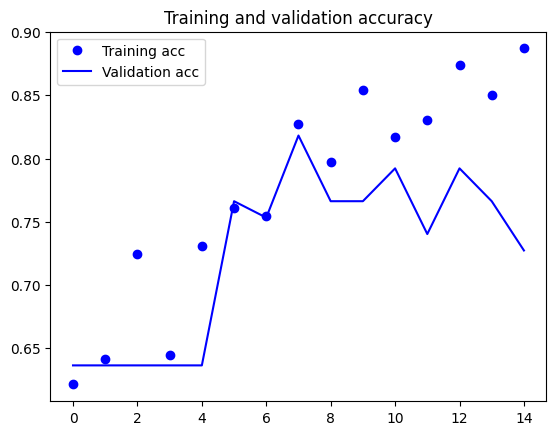

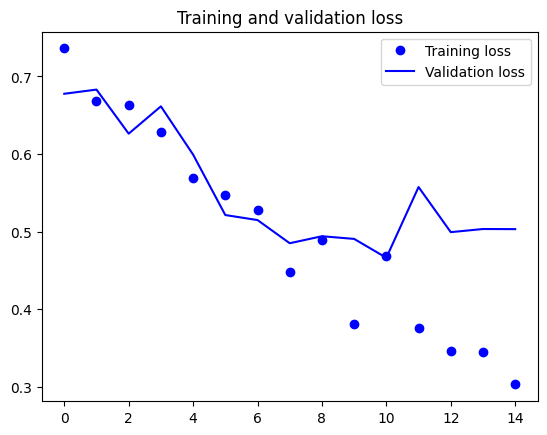

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

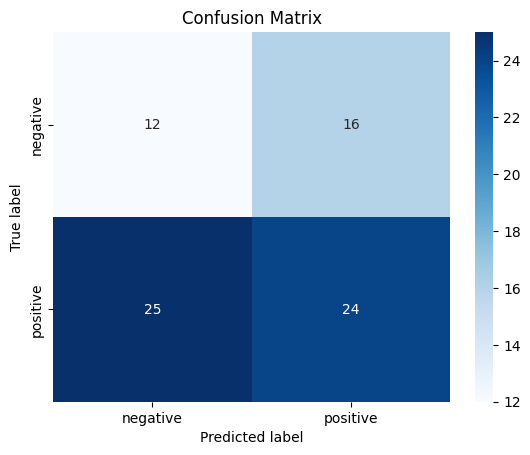

In [30]:
import seaborn as sns

# Get labels for confusion matrix
class_names = validation_generator.class_indices.keys()

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Set plot labels
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show plot
plt.show()
